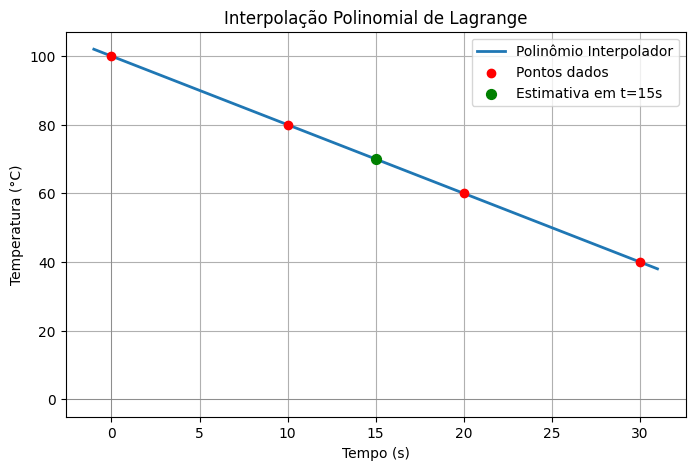

In [ ]:
# Questão 1


import matplotlib.pyplot as plt
import numpy as np

import numpy as np

def lagrange_interpolacao(x_pontos, y_pontos, x):
    """
    Calcula o valor do polinômio interpolador de Lagrange no ponto x.
    """
    try:
        x_pts = np.array(x_pontos, dtype=float)
        y_pts = np.array(y_pontos, dtype=float)
    except (ValueError, TypeError) as e:
        raise TypeError("x_pontos e y_pontos devem ser iteráveis de números.") from e

    if x_pts.ndim != 1 or y_pts.ndim != 1:
        raise ValueError("x_pontos e y_pontos devem ser arrays unidimensionais.")
    
    if len(x_pts) == 0:
        raise ValueError("A lista de pontos não pode estar vazia.")
    
    if len(x_pts) != len(y_pts):
        raise ValueError("x_pontos e y_pontos devem ter o mesmo número de elementos.")
    
    if len(np.unique(x_pts)) != len(x_pts):
        raise ValueError("Todos os valores em x_pontos devem ser distintos.")
    n = len(x_pts)
    resultado = 0.0
    for j in range(n):
        termo = y_pts[j]
        for m in range(n):
            if m != j:
                termo *= (x - x_pts[m]) / (x_pts[j] - x_pts[m])
        resultado += termo
    return resultado

x_vals = [0, 10, 20, 30]
y_vals = [100, 80, 60, 40]
t_est = 15  

try:
    temp_15 = lagrange_interpolacao(x_vals, y_vals, t_est)
except ValueError as e:  
    print(f"Erro: {e}")
except Exception as e: 
    print(f"Erro inesperado: {e}")
else:
    x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
    y_plot = [lagrange_interpolacao(x_vals, y_vals, x) for x in x_plot]

    plt.figure(figsize=(8, 5))
    plt.plot(x_plot, y_plot, label='Polinômio Interpolador', linewidth=2)
    plt.scatter(x_vals, y_vals, color='red', label='Pontos dados', zorder=5)

    plt.scatter(t_est, temp_15, color='green', s=50, label=f'Estimativa em t={t_est}s', zorder=6)
    plt.title('Interpolação Polinomial de Lagrange')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Temperatura (°C)')
    plt.grid(True)
    plt.legend()
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.show()


### 2ª Questão

Considere \(n+1\) pontos distintos \(\{(x_0,y_0), (x_1,y_1), \dots, (x_n,y_n)\}\). O polinômio interpolador de Lagrange de grau ≤ \(n\) é dado por:

\[
P(x) = \sum_{j=0}^{n} y_j L_j(x),
\qquad
L_j(x) = \prod_{\substack{0 \le m \le n \\ m \neq j}} \frac{x - x_m}{x_j - x_m}.
\]

---

#### a) Ideia principal e finalidade

- **Ideia**: construir **polinômios-base** \(L_j(x)\) de grau \(n\) que “se ligam” apenas a um ponto \((x_j,y_j)\), ou seja:
  \[
  L_j(x_i) =
  \begin{cases}
    1, & i = j, \\
    0, & i \neq j.
  \end{cases}
  \]
- **Finalidade**: obter de forma **explícita** um único polinômio \(P(x)\) que passe por todos os pontos dados, sem precisar resolver sistemas lineares.

---

#### b) Justificativa de que \(P(x_i) = y_i\)

Ao avaliar \(P\) num ponto de dados \(x_i\):

\[
P(x_i)
= \sum_{j=0}^n y_j L_j(x_i)
= \sum_{j=0}^n y_j \delta_{ji}
= y_i,
\]

onde \(\delta_{ji}\) é o **delta de Kronecker**. Isso ocorre porque, para cada \(j \neq i\), \(L_j(x_i) = 0\), e para \(j = i\), \(L_i(x_i) = 1\).

---

#### c) Vantagem em relação a sistemas lineares

1. **Fórmula explícita**: não há necessidade de montar e resolver (por exemplo) o sistema de Vandermonde \(\mathbf{V}c = \mathbf{y}\).
2. **Modularidade**: ao adicionar ou remover um ponto, basta recomputar os \(L_j\); não é preciso refatorar um sistema inteiro.
3. **Implementação direta**: cada \(L_j\) tem expressão simples em produto, facilitando o código para poucos pontos.

---

#### d) Principais limitações para muitos pontos

1. **Complexidade computacional**: o cálculo de cada \(L_j(x)\) custa \(O(n)\), e há \(n+1\) deles, totalizando \(O(n^2)\) para uma única avaliação de \(P(x)\).
2. **Instabilidade numérica**: produtos e somas de muitos termos podem gerar **erros de arredondamento** significativos.
3. **Oscilações (Runge)**: quanto maior o grau, maior a probabilidade de oscilações indesejadas (ver item e)).
4. **Pouca adaptabilidade**: polinômios de grau alto tendem a “oscilar” entre pontos distantes; não é adequado para funções muito variáveis em intervalos amplos.

---

#### e) Fenômeno de Runge

- **Definição**: ao interpolar uma função suave (por exemplo, \(f(x) = \frac{1}{1 + x^2}\)) por polinômios de alto grau em **nós igualmente espaçados**, surgem grandes oscilações perto das extremidades do intervalo — o chamado **fenômeno de Runge**.
- **Relação**: o polinômio de Lagrange, sendo de grau elevado e usando nós uniformes, está sujeito a esse fenômeno.  
- **Soluções comuns**: empregar **nós de Chebyshev** (mais aglomerados nas extremidades) ou métodos de interpolação por **splines** para mitigar as oscilações.

---

### 3ª Questão – Splines Cúbicas

Considere um conjunto de dados \((x₀, y₀), (x₁, y₁), \dots, (xₙ, yₙ)\), com \(x₀ < x₁ < \cdots < xₙ\).

---

#### a) Ideia geral da interpolação por splines cúbicas

### Definição por partes
Em vez de usar um único polinômio de grau elevado sobre todo o domínio, dividimos o intervalo \([x₀, xₙ]\) em \(n\) subintervalos \([xᵢ, xᵢ₊₁]\) e, em cada um, ajustamos um polinômio de grau 3:

\[
Sᵢ(x) = aᵢ + bᵢ(x - xᵢ) + cᵢ(x - xᵢ)^2 + dᵢ(x - xᵢ)^3
\]

### Vantagens sobre polinômios globais

- **Redução de oscilações**: evita o fenômeno de Runge.
- **Controle local**: alterar um par de pontos afeta apenas os polinômios vizinhos.
- **Suavidade**: garante continuidade das derivadas até a segunda ordem.
- **Estabilidade numérica**: polinômios de baixo grau evitam coeficientes muito grandes.

---

#### b) Condições de suavidade entre subintervalos

Para que o conjunto \(\{Sᵢ(x)\}\) forme uma curva suave, impomos em cada nó interno \(xᵢ\) (\(1 \leq i \leq n-1\)) as seguintes condições:

- **Interpolação**:
  \[
  Sᵢ₋₁(xᵢ) = yᵢ \quad \text{e} \quad Sᵢ(xᵢ) = yᵢ
  \]

- **Continuidade da 1ª derivada**:
  \[
  Sᵢ₋₁'(xᵢ) = Sᵢ'(xᵢ)
  \]

- **Continuidade da 2ª derivada**:
  \[
  Sᵢ₋₁''(xᵢ) = Sᵢ''(xᵢ)
  \]

Essas condições garantem que a curva não apresente "quebras" de inclinação ou curvatura.

---

#### c) Spline cúbica natural vs. spline cúbica clamped

### Spline cúbica natural

- Impõe as condições de suavidade acima e define as segundas derivadas nas extremidades como zero:
  \[
  S''(x₀) = 0 \quad \text{e} \quad S''(xₙ) = 0
  \]
- Resulta em uma curva com "curvatura mínima" nas bordas.

### Spline cúbica clamped (ou com derivadas fixadas)

- Além das condições internas, fixa as primeiras derivadas nas extremidades:
  \[
  S'(x₀) = f'(x₀) \quad \text{e} \quad S'(xₙ) = f'(xₙ)
  \]
- Útil quando se conhece a inclinação desejada nos pontos finais.

---

#### d) Vantagens e limitações em aplicações reais

| **Vantagens**                                    | **Limitações**                                              |
|--------------------------------------------------|-------------------------------------------------------------|
| Suavidade (\(C^2\)) e boa aproximação local       | Exige solução de sistema linear (custo proporcional a \(n\)) |
| Estabilidade e baixo grau em cada segmento       | Condições de contorno podem influenciar a forma final        |
| Controle local: alterações locais são isoladas   | Não captura bem descontinuidades ou "cantoneiras"            |
| Uso difundido em CAD, gráficos e engenharia      | Aumento de memória e custo computacional para muitos pontos |

---

#### e) Sistema linear tridiagonal

As condições de continuidade levam a um sistema linear para as segundas derivadas \(mᵢ = S''(xᵢ)\). Em cada nó interno \(i\) (\(1 \leq i \leq n-1\)):

\[
\frac{hᵢ₋₁}{6}mᵢ₋₁ + \frac{hᵢ₋₁ + hᵢ}{3}mᵢ + \frac{hᵢ}{6}mᵢ₊₁ = \frac{yᵢ₊₁ - yᵢ}{hᵢ} - \frac{yᵢ - yᵢ₋₁}{hᵢ₋₁}
\]

onde:

\[
hᵢ = xᵢ₊₁ - xᵢ
\]

### Tri-diagonal

Cada equação envolve apenas \(mᵢ₋₁\), \(mᵢ\) e \(mᵢ₊₁\), gerando uma matriz esparsa com três diagonais.

### Eficiência

O sistema pode ser resolvido eficientemente usando o **algoritmo de Thomas**, com tempo proporcional a \(n\).

---


In [ ]:
# Questão 3



In [ ]:
# Questão 4

import numpy as np

def matriz_triangular(A, b):

    n = len(A)
    A = A.astype(float)
    b = b.astype(float)

    for i in range(n):
        for j in range(i + 1, n):
            fator = A[j][i] / A[i][i]
            A[j][i:] = A[j][i:] - fator * A[i][i:]
            b[j] = b[j] - fator * b[i]
    return A, b

def resolve(A, b):
    n = len(b)
    x = np.zeros(n)
    for i in reversed(range(n)):
        soma = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - soma) / A[i][i]
    return x

A = np.array([
    [2, 3, 1],
    [4, 7, 2],
    [6, 18, 5]
])

b = np.array([1, 3, 5])

A_tri, b_tri = matriz_triangular(A.copy(), b.copy())

print("Matriz triangular superior A:")
print(A_tri)

print('')
print("Vetor b ajustado:")
print(b_tri)

print('')
solucao = resolve(A_tri, b_tri)
print("Solução do sistema:")
print(solucao)


Matriz triangular superior A:
[[2. 3. 1.]
 [0. 1. 0.]
 [0. 0. 2.]]

Vetor b ajustado:
[ 1.  1. -7.]

Solução do sistema:
[ 0.75  1.   -3.5 ]


In [ ]:
# Questão 5

import numpy as np

def triangular_inferior(A, b):
    """
    Transforma a matriz A em triangular inferior.
    """
    n = len(A)
    A = A.astype(float)
    b = b.astype(float)

    for i in range(n-1, -1, -1):  # Começa da última linha
        for j in range(i-1, -1, -1):  # Zera acima da diagonal
            fator = A[j][i] / A[i][i]
            A[j][:] = A[j][:] - fator * A[i][:]
            b[j] = b[j] - fator * b[i]
    
    return A, b

def resolver_triangular_inferior(A, b):
    """
    Resolve o sistema triangular inferior A·x = b.
    """
    n = len(b)
    x = np.zeros(n)

    for i in range(n):
        soma = sum(A[i][j] * x[j] for j in range(i))
        x[i] = (b[i] - soma) / A[i][i]
    return x

A = np.array([
    [2, 3, 1],
    [4, 7, 2],
    [6, 18, 5]
])

b = np.array([1, 3, 5])

A_tri, b_tri = triangular_inferior(A.copy(), b.copy())

print("Matriz triangular inferior A:")
print(np.round(A_tri, 2))

print("\nVetor b ajustado:")
print(np.round(b_tri, 2))

solucao = resolver_triangular_inferior(A_tri, b_tri)
print("\nSolução do sistema:")
print(np.round(solucao, 4))


Matriz triangular inferior A:
[[-4.   0.   0. ]
 [ 1.6 -0.2  0. ]
 [ 6.  18.   5. ]]

Vetor b ajustado:
[-3.  1.  5.]

Solução do sistema:
[ 0.75  1.   -3.5 ]


In [ ]:
# Questão 6
import numpy as np

# Dados
A = np.array([
    [4, -1, 0],
    [-1, 4, -1],
    [-1, -1, 4]
], dtype=float)

b = np.array([5, 5, 5], dtype=float)

# Passo 1: Decomposição de Cholesky -> A = L * L.T
L = np.linalg.cholesky(A)

num_zeros = 0
total_elements = A.size

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if A[i, j] == 0:
            num_zeros += 1

condicionamento = num_zeros / total_elements
print(f"\nNúmero de condicionamento (proporção de zeros): {condicionamento:.4f}")

print("Matriz L (triangular inferior):")
print(np.round(L, 4))

# Passo 2: Resolver L·y = b (substituição direta)
y = np.linalg.solve(L, b)
print("\nVetor y:")
print(np.round(y, 4))

# Passo 3: Resolver Lᵗ·x = y (substituição reversa)
x = np.linalg.solve(L.T, y)
print("\nSolução final (V):")
print(np.round(x, 4))


# L.y = b
# U.x = y

# y = L^-1.b
# x = U^-1.y


Número de condicionamento (proporção de zeros): 0.1111
Matriz L (triangular inferior):
[[ 2.      0.      0.    ]
 [-0.5     1.9365  0.    ]
 [-0.5    -0.6455  1.8257]]

Vetor y:
[2.5    3.2275 4.5644]

Solução final (V):
[2.5 2.5 2.5]


In [ ]:
import numpy as np
import sys

def decomposicao_LU(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.astype(float).copy()

    for i in range(n):
        if np.isclose(U[i, i], 0):
            raise ZeroDivisionError(f"Pivot zero em U[{i},{i}] durante LU.")
        for j in range(i+1, n):
            fator = U[j, i] / U[i, i]
            L[j, i] = fator
            U[j, i:] -= fator * U[i, i:]
    return L, U

def substituicao_direta(L, b):
    n = L.shape[0]
    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]
    return y

def substituicao_reversa(U, y):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

def verificar_determinante(matriz, tol=1e-12):
    det = np.linalg.det(matriz)
    print(f"Determinante: {det:.4e}")
    return not np.isclose(det, 0, atol=tol)

def numero_de_condicionamento(matriz, norma=np.inf):
    cond = np.linalg.cond(matriz, p=norma)
    print(f"Número de condicionamento (norma {norma}): {cond:.4e}")
    return cond

def resolver_sistema(A, b, tol_det=1e-12, cond_max=1e3, norma=np.inf):
    if not verificar_determinante(A, tol=tol_det):
        print(f"ERRO: determinante igual ou muito próximo de zero (≤ {tol_det}).")
        return

    cond = numero_de_condicionamento(A, norma=norma)
    if cond > cond_max:
        print(f"ERRO: matriz mal-condicionada (cond = {cond:.4e} > {cond_max}).")
        return

    L, U = decomposicao_LU(A)
    y = substituicao_direta(L, b)
    x = substituicao_reversa(U, y)

    print("\nMatriz L:")
    print(np.round(L, 4))

    print("\nMatriz U:")
    print(np.round(U, 4))

    print("\nVetor solução x:")
    print(np.round(x, 4))
    return x


# Exemplo de uso
A = np.array([
    [20, -15, 0],
    [-15, 50, -25],
    [0, -25, 45],
], dtype=float)

b = np.array([80, 0, -50], dtype=float)

resolver_sistema(A, b, norma=np.inf)
# resolver_sistema(A, b, norma=1)
# resolver_sistema(A, b, norma=2)
# resolver_sistema(A, b, norma='fro')


Determinante: 2.2375e+04
Número de condicionamento (norma inf): 1.0760e+01

Matriz L:
[[ 1.      0.      0.    ]
 [-0.75    1.      0.    ]
 [ 0.     -0.6452  1.    ]]

Matriz U:
[[ 20.    -15.      0.   ]
 [  0.     38.75  -25.   ]
 [  0.      0.     28.871]]

Vetor solução x:
[ 4.9721  1.2961 -0.3911]
Determinante: 2.2375e+04
Número de condicionamento (norma 1): 1.0760e+01

Matriz L:
[[ 1.      0.      0.    ]
 [-0.75    1.      0.    ]
 [ 0.     -0.6452  1.    ]]

Matriz U:
[[ 20.    -15.      0.   ]
 [  0.     38.75  -25.   ]
 [  0.      0.     28.871]]

Vetor solução x:
[ 4.9721  1.2961 -0.3911]
Determinante: 2.2375e+04
Número de condicionamento (norma 2): 7.5680e+00

Matriz L:
[[ 1.      0.      0.    ]
 [-0.75    1.      0.    ]
 [ 0.     -0.6452  1.    ]]

Matriz U:
[[ 20.    -15.      0.   ]
 [  0.     38.75  -25.   ]
 [  0.      0.     28.871]]

Vetor solução x:
[ 4.9721  1.2961 -0.3911]
Determinante: 2.2375e+04
Número de condicionamento (norma fro): 8.7182e+00

Matriz L:
[[ 

array([ 4.97206704,  1.29608939, -0.39106145])